<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Machine_Learning_Avancada/blob/main/Linguagem_Natural_parte_1_NLP_com_analise_de_sentimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **01 Dados Textuais: classificação e exploração.**

## **Machine Learning para classificar textos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/alura_curssos/imdb-reviews-pt-br.csv', on_bad_lines='skip')
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [ ]:
df.describe()

,id
count,49459.000000
mean,24730.960917
std,14277.792868
min,1.000000
25%,12366.500000
50%,24731.000000
75%,37095.500000
max,49460.000000


In [ ]:
df.isna().sum()

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df.text_pt, df.sentiment, random_state=42)

In [ ]:
X_treino

1348     Embora o filme tenha sido apenas assim, o clos...
27466    Este é provavelmente um dos piores filmes que ...
29998    De vez em quando, um filme irá varrer ao seu r...
48186    Este é um conto completamente diabólico de quã...
26473    Lenta, chata, extremamente repetitiva. Não adm...
                               ...                        
11284    Naach teria ganhado um Razzie para o Pior Film...
44732    Apenas assisti a esse filme em DVD e achei a a...
38158    Melhor show desde Seinfeld. Ela é realmente mu...
860      Eu pareço estar discordando com muitas pessoas...
15795    Minhas duas filhas de 11 e 13 anos e eu tive s...
Name: text_pt, Length: 37094, dtype: object

In [ ]:
y_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

In [ ]:
y_treino

1348     neg
27466    neg
29998    neg
48186    pos
26473    neg
        ... 
11284    neg
44732    pos
38158    pos
860      neg
15795    pos
Name: sentiment, Length: 37094, dtype: object

In [ ]:
y_teste

12532    pos
35445    neg
20279    pos
2969     neg
45161    pos
        ... 
16421    pos
39861    pos
309      neg
20638    pos
38935    pos
Name: sentiment, Length: 12365, dtype: object

## **Explorando dados textuais**

In [ ]:
print('Negativo \n')
print(df.text_pt[100])

Negativo 

Imagine cada clichê estereotipado e exagerado de todos os filmes e programas de TV nas ruas de Brooklyn entre 1930 e 1980. Preencha-o com um elenco de caricaturas intercambiáveis ​​em vez de personagens reais. Acrescente uma mistura de músicas de "período" e guitarras elétricas lamentáveis ​​durante as cenas "estrondosas". Em seguida, passe o tempo tentando descobrir ou importar qual dos Deuces vai ser morto no estrondo final anticlímax.Eu vou dar este filme aponta para não ser apenas mais uma comédia romântica, teen slasher, filme de ação explosivo, comédia de sexo adolescente, infantil musical, ou veículo de indicação ao Oscar. Mas trazer algo novo ou interessante para o gênero da tragédia das gangues de rua pode ter sido bom.


In [ ]:
print('Positivo \n')
print(df.text_pt[38935])

Positivo 

Eu vi alguns filmes sobre transtornos alimentares, mas este foi definitivamente o meu favorito. O problema com os outros foi que as pessoas com transtornos alimentares no final apenas automaticamente melhoram ou aceitam o fato de precisarem de ajuda e isso. este filme eu pensei que era mais realista porque neste caso o personagem principal Lexi não fica automaticamente melhor. Ela fica melhor e depois tem uma desvantagem. Eu acho que este filme mostra mais do que os outros que eu vi que melhorar não acontece, seu trabalho duro e leva tempo, é um longo caminho para a recuperação. Eu acho que esse filme mostra tudo isso muito bem. Deveria haver mais filmes assim.


In [ ]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
df

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [ ]:
classificacao = df.sentiment.replace(['neg', 'pos'], [0,1])
classificacao

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: sentiment, Length: 49459, dtype: int64

In [ ]:
df['classificacao'] = classificacao
df

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


# **02 Bag of Words: criando representações da linguagem humana.**

## **Bag of words**

O modelo saco-de-palavras é uma representação simplificada utilizada no processamento de linguagem natural e na recuperação de informações. Neste modelo, o texto é representado como um multiconjunto de suas palavras, desconsiderando a estrutura gramatical e até mesmo a ordenação delas, mas mantendo sua multiplicidade

## **Bag of Words - um exemplo em Python**

In [ ]:
texto = ["Assistir um filme ótimo", "Assistir um filme ruim"]
texto

['Assistir um filme ótimo', 'Assistir um filme ruim']

In [ ]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
vetorizar.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Assistir', 'filme', 'ruim', 'um', 'ótimo']

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names())
matriz_esparsa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Assistir,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## **Bag of Words - aplicando em um caso real**

In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
bag_of_words.shape

(49459, 50)

In [ ]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns=vetorizar.get_feature_names())
matriz_esparsa

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,...,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,...,0,0,0,0,3,0,0,4,1,2


In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words , 
                                                              df.classificacao,
                                                              random_state=42)

In [ ]:
regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)

LogisticRegression()

In [ ]:
acuracia = regressao_logistica.score(X_teste, y_teste)
print(acuracia)

0.6583097452486858


## **Criando uma função para classificar sentimentos**

In [ ]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):  
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

  X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words , 
                                                              texto[coluna_classificacao],
                                                              random_state=42)

  regressao_logistica = LogisticRegression(solver='lbfgs')
  regressao_logistica.fit(X_treino, y_treino)
  return  regressao_logistica.score(X_teste, y_teste)

In [ ]:
print(classificar_texto(df, 'text_pt', 'classificacao'))

0.6583097452486858


# **03 Visualizando os dados com WordCloud**

## **WordCloud - conhecendo a visualização**

In [ ]:
from wordcloud import WordCloud

In [ ]:
todas_palavras = [texto for texto in df.text_pt]
todas_palavras

['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [ ]:
len(todas_palavras)

49459

In [ ]:
todas_palavras = ' '.join([texto for texto in df.text_pt])
len(todas_palavras)

63448424

In [ ]:
nuvem_palavras = WordCloud().generate(todas_palavras)

In [ ]:
nuvem_palavras

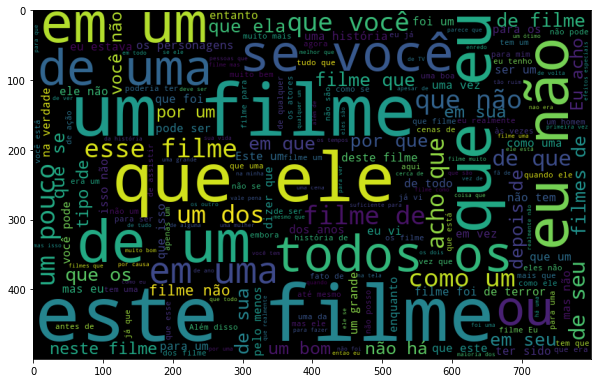

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras)

## **WordCloud - otimizando a visualização**

In [ ]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)

(-0.5, 799.5, 499.5, -0.5)

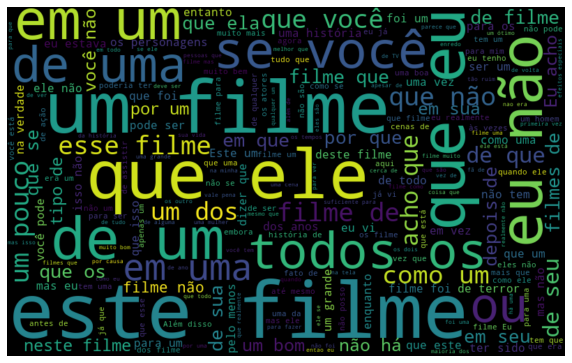

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")

In [ ]:
nuvem_palavras = WordCloud(width=800, 
                           height=500, 
                           max_font_size=110,
                           collocations=False).generate(todas_palavras)

(-0.5, 799.5, 499.5, -0.5)

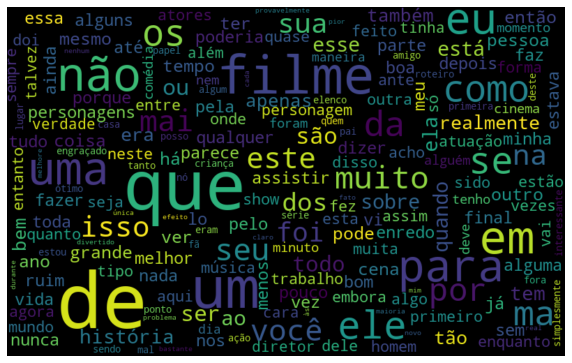

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")

## **Segregando entre negativo e positivo**

In [ ]:
df.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [ ]:
def nuvem_palavras_negativa(texto, coluna_texto):  
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, 
                            height=500, 
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")

In [ ]:
def nuvem_palavras_positiva(texto, coluna_texto):  
  texto_positivo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, 
                            height=500, 
                            max_font_size=110,
                            collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis("off")

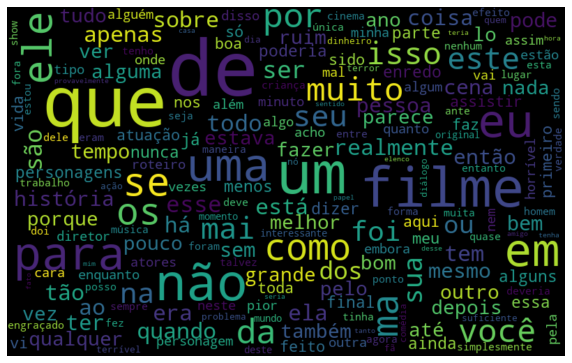

In [ ]:
nuvem_palavras_negativa(df, 'text_pt')

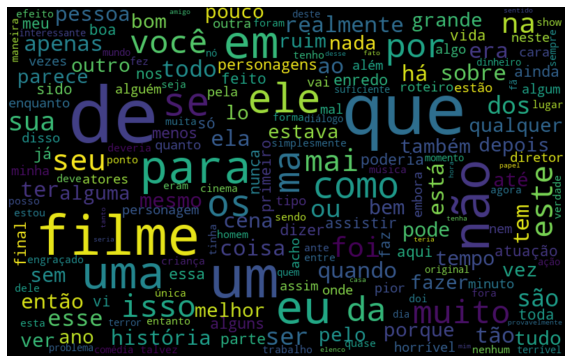

In [ ]:
nuvem_palavras_positiva(df, 'text_pt')

# **04 Tokenização e a bliblioteca NLTK**

## **Conhecendo a biblioteca NLTK**

O Natural Language Toolkit, ou mais comumente o NLTK, é um conjunto de bibliotecas e programas para processamento simbólico e estatístico da linguagem natural para inglês, escrito na linguagem de programação Python.

In [ ]:
import nltk 

In [ ]:
frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

## **Tokenização - explorando o conceito**

In [ ]:
from nltk import tokenize

In [ ]:
frase = "Bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']


## **Tokenização - aplicando no dataset**

In [ ]:
todas_palavras = ' '.join([texto for texto in df.text_pt])
len(todas_palavras)

63448424

In [ ]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [ ]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
df_frequencia.head()  

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741


In [ ]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# **05 Uma nova visualização e os stop words**

## **Pareto - criação e exploração**

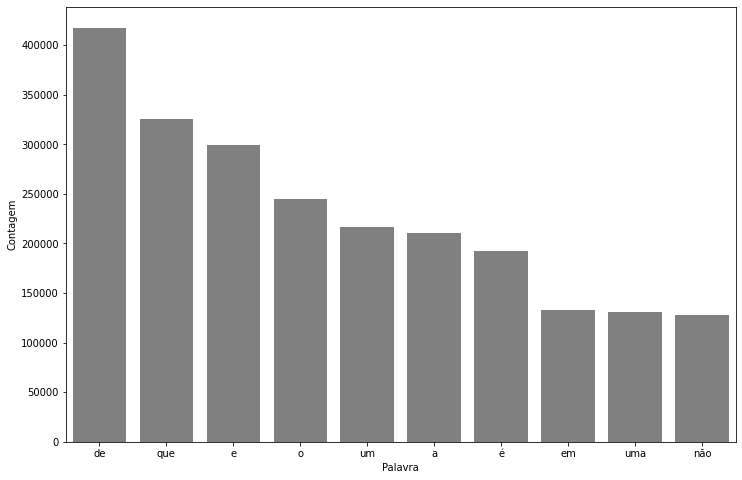

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns= "Frequência", n = 10), x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

## **Pareto - criando uma função**

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [ ]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()

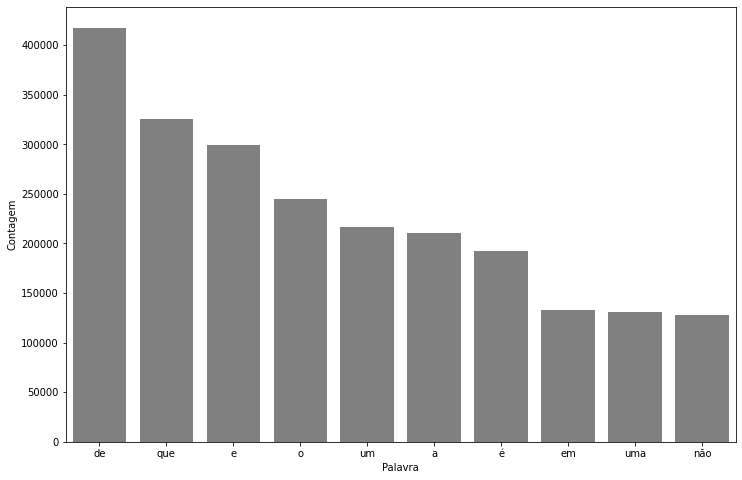

In [ ]:
pareto(df, "text_pt", 10)

## **Stop Words - removendo o que não agrega**

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
frase_processada = list()
for opiniao in df.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

In [ ]:
df["tratamento_1"] = frase_processada

In [ ]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [ ]:
classificar_texto(df, 'tratamento_1','classificacao')

0.6607359482410028

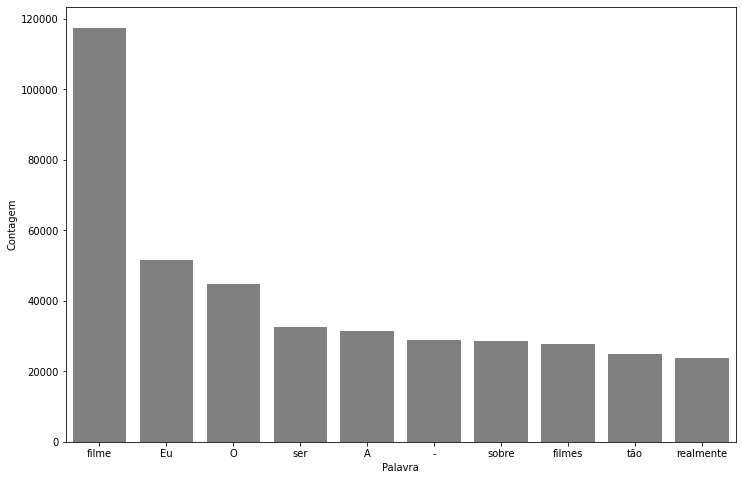

In [ ]:
pareto(df,"tratamento_1", 10)